<h3>Cyfrowe przetwarzanie sygnałów i obrazów  -  Laboratorium 1 </h3>
Daria Jeżowska, 252731  <br>
Szymon Hutnik,  <br>


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


<h3>Zadanie 1</h3>
Napisz skrypt w Pythonie/Matlabie umozliwiajacy wczytywanie i wizualizacje
badanych sygnałów. Program powinien umozliwiac obserwowanie wycinka
sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

1. ekg1.txt – 12 kolumn odpowiada odprowadzeniom, fs = 1000 Hz

In [4]:
ekg1 = pd.read_csv('ekg1.txt', 
                  names = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12'], 
                  sep= ' ')
fs_ekg1 = 1000 # częstotliwość sygnału [Hz]
t_ekg1 = (ekg1.shape[0] - 1) / fs_ekg1 # czas trwania sygnału, t = f/T [s] 
ekg1['t'] = ekg1.index/fs_ekg1
ekg1 = ekg1.set_index('t')
ekg1.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12
t,,,,,,,,,,,,
0.000,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.001,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.002,106,325,219,-219,-60,284,492,837,239,372,908,405
0.003,86,306,219,-214,-55,274,487,832,240,404,179,-63
0.004,96,320,224,-195,-65,264,492,842,244,404,174,-62


In [5]:
ekg100 = pd.read_csv('ekg100.txt', names = ['column'])
fs_ekg100 = 360 # częstotliwość sygnału [Hz]
t_ekg100 = (ekg100.shape[0] - 1) / fs_ekg100 # czas trwania sygnału, t = f/T [s] 
ekg100['t'] = ekg100.index/fs_ekg100
ekg100 = ekg100.set_index('t')
ekg100.head()

,column
t,
0.000000,-0.145
0.002778,-0.145
0.005556,-0.145
0.008333,-0.145
0.011111,-0.145


In [6]:
ekg_noise = pd.read_csv('ekg_noise.txt', names = ['t', 'A'], sep = '\s+', index_col = 0)
fs_ekg_noise = 360 # częstotliwość sygnału, t = f/T
t_ekg_noise = (ekg_noise.shape[0] - 1) / fs_ekg_noise # czas trwania sygnału, t = f/T [s] 
ekg_noise.head()

,A
t,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


Text(0, 0.5, 'Wartość')

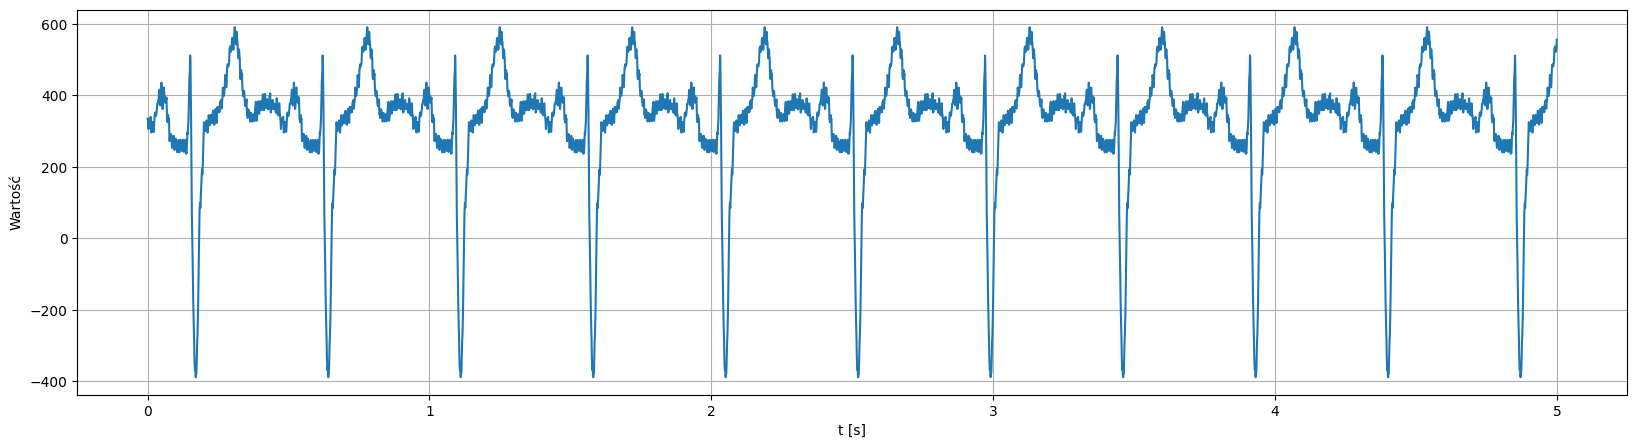

In [7]:
mpl.style.use('default')
x = ekg1.index
y = ekg1['k2']
plt.figure(figsize=(20,5))
plt.plot(x, y, label='kolumna nr 2', markerfacecolor = 'black')
plt.grid(axis='both')
plt.xlabel('t [s]')
plt.ylabel('Wartość')


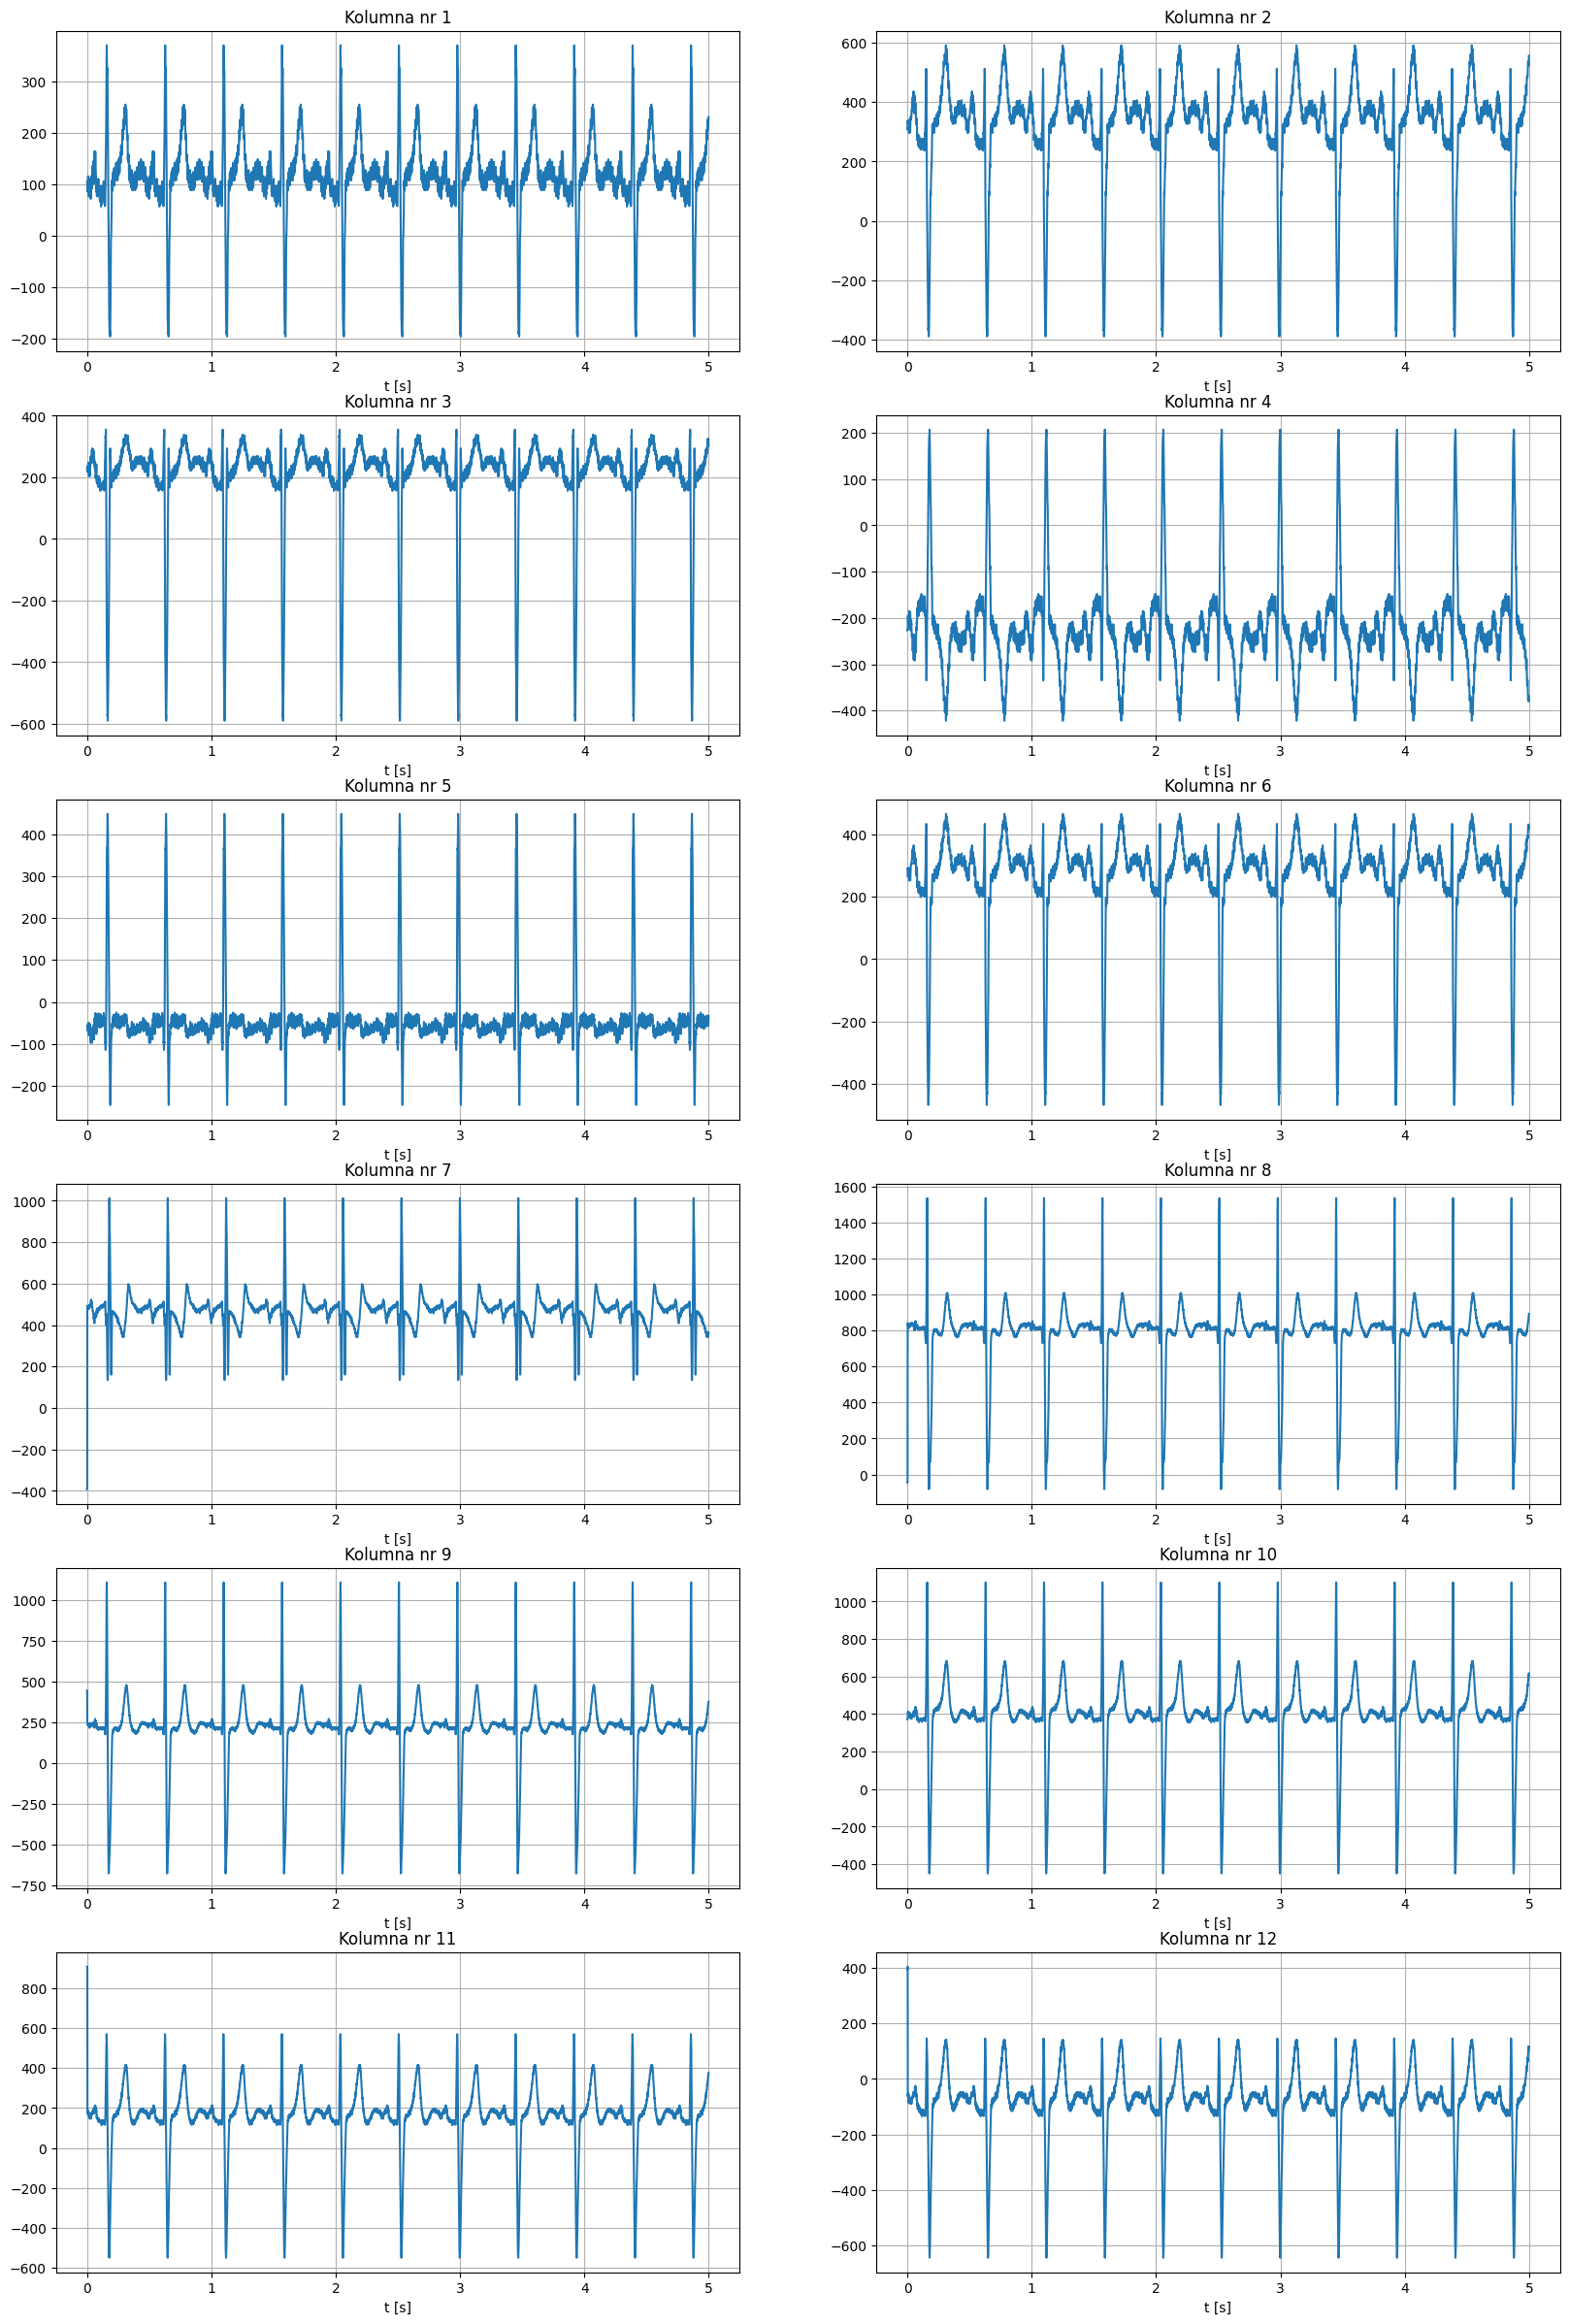

In [8]:
plt.figure(figsize=(20,30))
for i in range(1, 13):
    x = ekg1.index
    y = ekg1[f'k{i}']

    plt.subplot(6, 2, i)

    plt.plot(x, y)
    plt.grid(axis='both')
    plt.xlabel('t [s]')
    plt.title(f'Kolumna nr {i}')

### Zadanie 2 ###
Celem cwiczenia jest praktyczne wypróbowanie funkcji numpy.fft i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].


1. Wygeneruj ciag próbek odpowiadajacy fali sinusoidalnej o czestotliwosci 50 Hz
i długosci 65536.


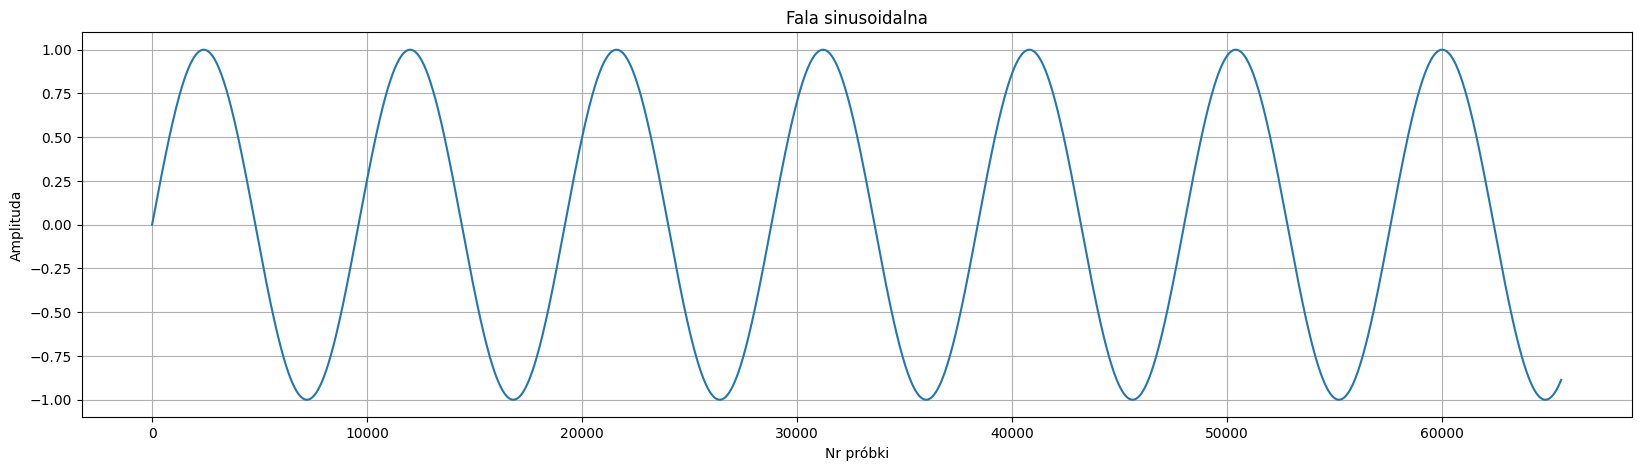

In [35]:
length = 65536
# częstotliwość
f = 50
# częstotliwość próbkowania
fs = 480000

n = np.arange(length) 
sin = np.sin(2 * np.pi * n * f / fs)

plt.figure(figsize=(20,5))
plt.plot(x, sin)
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.title('Fala sinusoidalna')
plt.grid(True, which='both')
plt.show()

2. Wyznacz dyskretna transformate Fouriera tego sygnału i przedstaw jego widmo
amplitudowe na wykresie w zakresie czestotliwosci [0, fs/2], gdzie fs oznacza
czestotliwosc próbkowania.


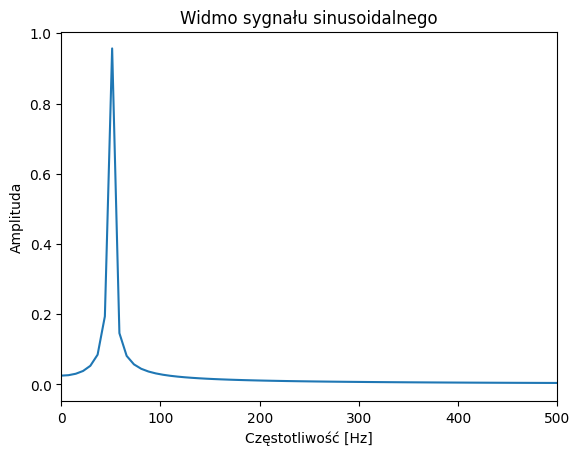

In [37]:
length = 65536

spectrum = np.abs(np.fft.rfft(sin)) / (length/2)
fs = 480000

f = np.fft.rfftfreq(length, 1/fs)

plt.plot(figsize=(20, 5))
plt.plot(f, spectrum)
plt.xlim(0, 500)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału sinusoidalnego')

plt.show()

3. Wygeneruj ciag próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
liniowej) o czestotliwosciach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
sygnału.


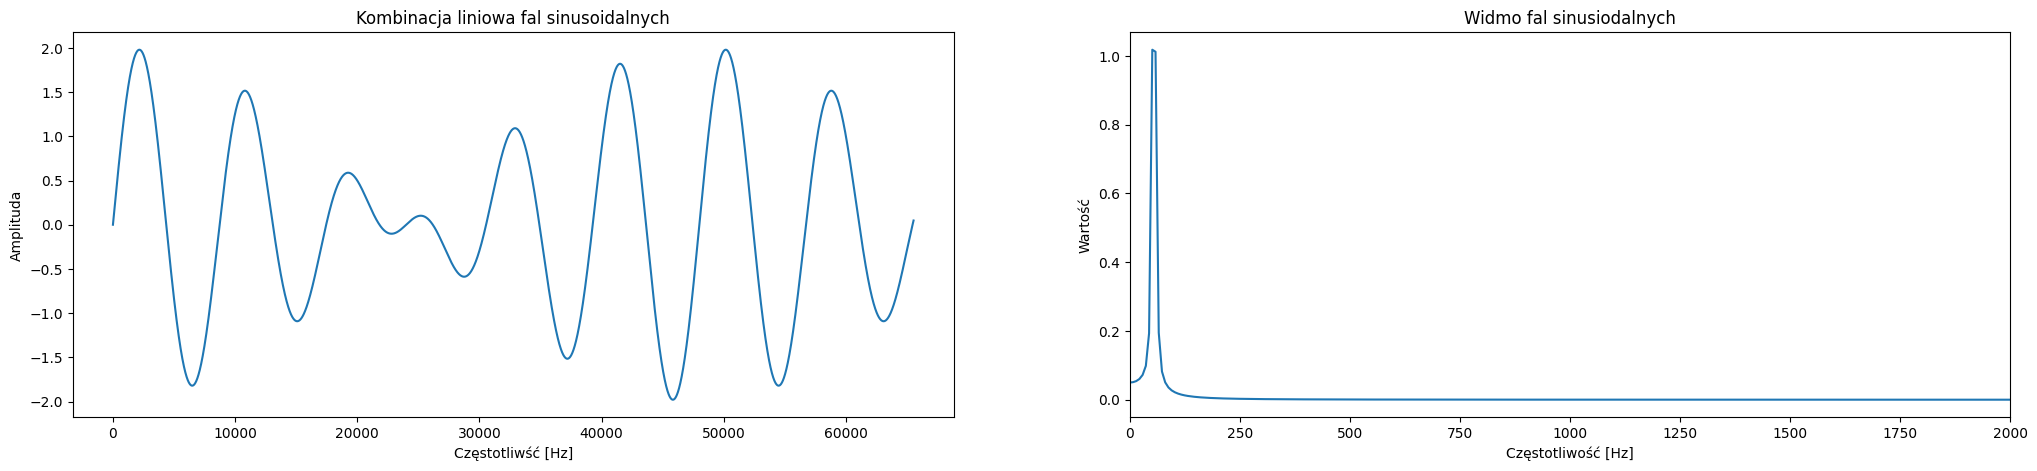

In [59]:
def spectrum_two_sinuses(f1, f2, fs):
    length = 65536
    x = np.arange(length)
    y1 = np.sin(2 * np.pi * x * f1 / fs )
    y2 = np.sin(2 * np.pi * x * f2 / fs )
    y = np.sin(2 * np.pi * x * f1 / fs ) + np.sin(2 * np.pi * x * f2 / fs )
    spectrum2 = np.fft.rfft(y)

    plt.figure(figsize = (25, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.title('Kombinacja liniowa fal sinusoidalnych')
    plt.xlabel('Częstotliwść [Hz]')
    plt.ylabel('Amplituda')

    plt.subplot(1, 2, 2)
    plt.plot(f, np.abs(spectrum2) / (length/2))
    plt.xlim(0, 2000)
    plt.title('Widmo fal sinusiodalnych')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Wartość')

    plt.show()

spectrum_two_sinuses(50, 60, 480000)

4. Powtórz eksperymenty dla róznych czasów trwania sygnałów, tzn. dla róznych
czestotliwosci próbkowania.


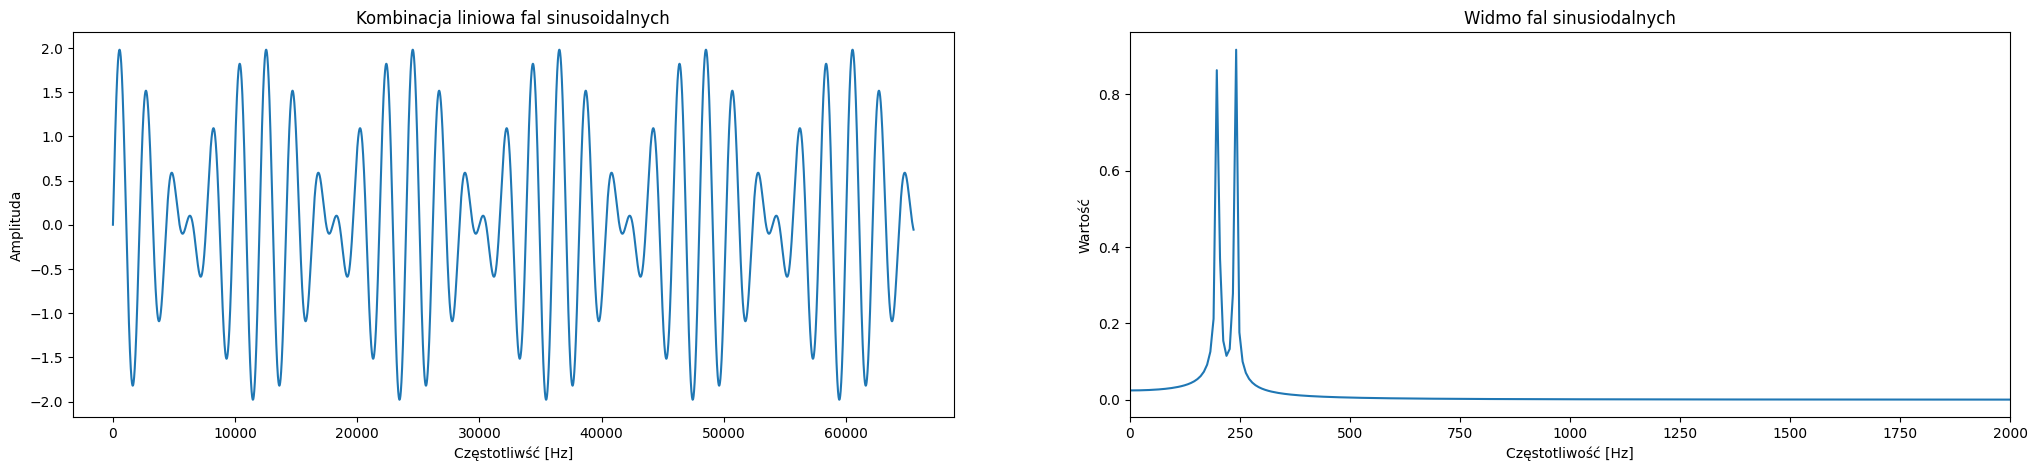

In [53]:
spectrum_two_sinuses(50, 60, 120000)

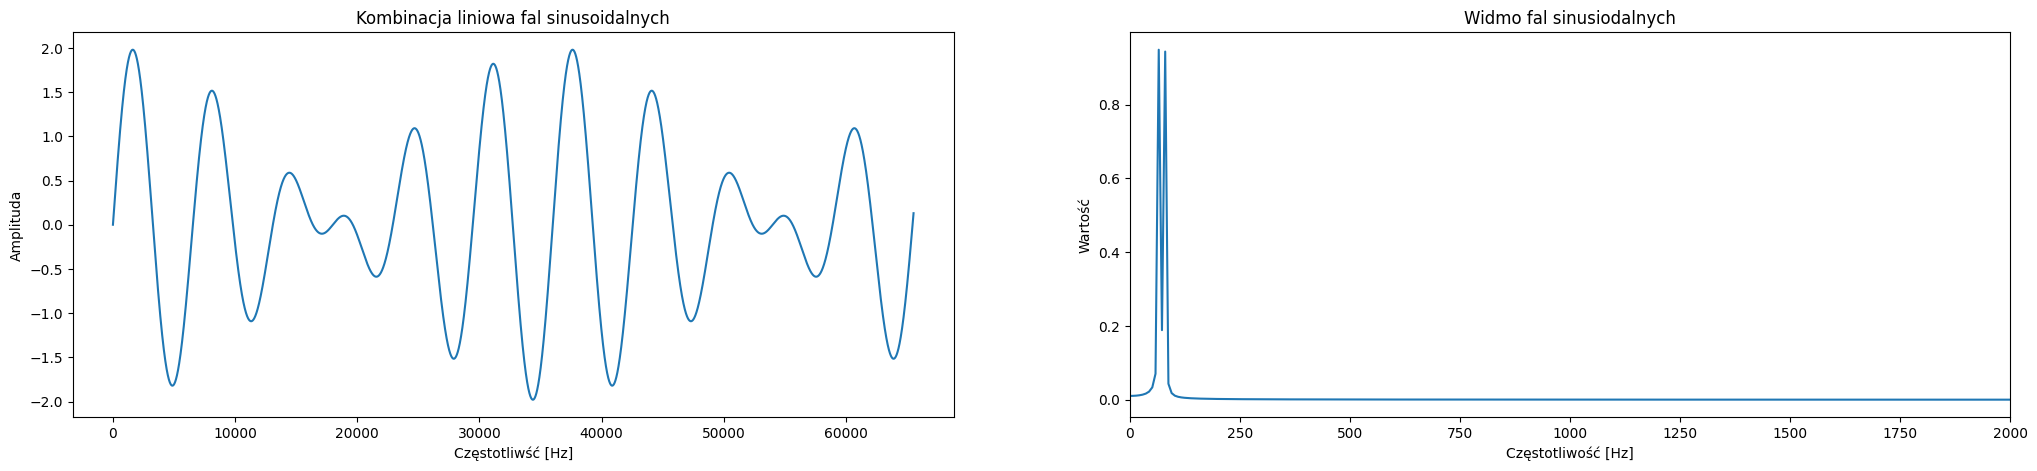

In [55]:
spectrum_two_sinuses(50,60, 360000)

5. Wyznacz odwrotne transformaty Fouriera ciagów wyznaczonych w zadaniu 2
i porównaj z ciagami oryginalnymi.

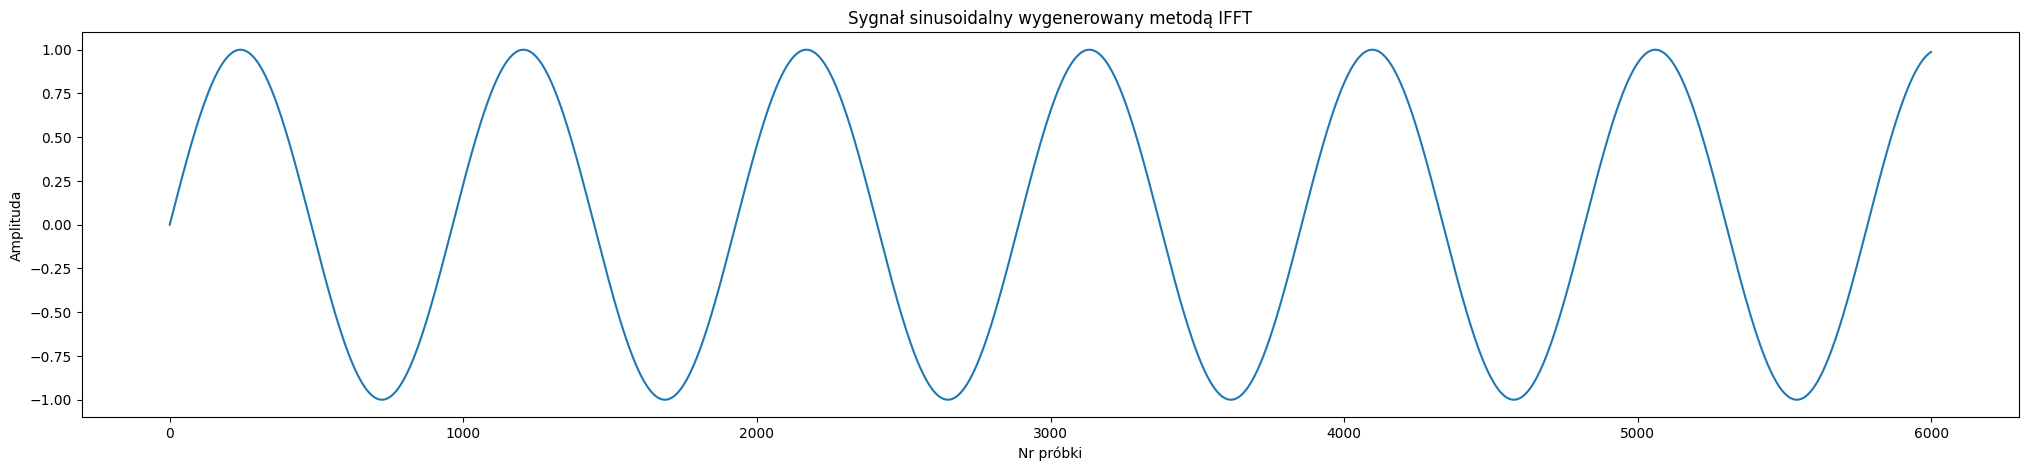

In [63]:
spectrum = np.zeros(int(length/2) + 1, dtype=complex)
spectrum[68] = -32768j

plot = np.real(np.fft.irfft(spectrum))
plt.figure(figsize=(25, 5))
plt.plot(plot[:6000])
plt.title('Sygnał sinusoidalny wygenerowany metodą IFFT')
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.show()